In [184]:
# application de kmeans pour la prevision sur data de house price
import pandas as pd

# load data
df=pd.read_csv('Housing300.csv')

data = df[['price', 'area', 'bedrooms', 'bathrooms']]
data
# RM: average number of rooms per dwelling



,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


In [196]:
data.describe()

,price,area,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


In [185]:
import numpy as np

def kmeans1(data, k, max_iter=2000, tolerance=1e-5):
    # Initialize the centroids randomly
    centroids = data[np.random.choice(data.shape[0], k, replace=False)] # cette ligne permet de choisir aléatoirement k points dans
    # le tableau data et de les mettre dans le tableau centroids 
    # replace=False permet de ne pas choisir deux fois le même point
    # data.shape[0] permet de récupérer le nombre de lignes de data
    # k est le nombre de centroid à choisir
    
    # Initialize the cluster labels
    labels = np.zeros(data.shape[0])# cette ligne permet de créer un tableau de 0 de la même taille que data 
    
    # Initialize the error
    error = float('inf')# cette ligne permet de créer une variable error qui contient une valeur infinie
    
    # Iterate until the error is within the tolerance
    for _ in range(max_iter):# cette ligne permet de faire une boucle sur le nombre d'itérations max
        # Assign points to clusters
        for i, point in enumerate(data):# cette ligne permet de parcourir le tableau data et de récupérer les points enumerate permet de récupérer l'index et la valeur de chaque point
            distances = np.linalg.norm(point - centroids, axis=1)# Calculate the distance between the point and each
            #centroid using the L2 norm (Euclidean distance) ecrit la relation L2: distance entre le point et chaque centroid et retourne un tableau de distances
            labels[i] = np.argmin(distances)# cette ligne permet de trouver le centroid le plus proche du point
            # cette ligne perment de retourner l'index du centroid le plus proche du point
        # Update the centroids
        new_centroids = np.zeros_like(centroids)# cette ligne permet de créer un tableau de 0 de la même taille que 
        # centroids (pour pouvoir y ajouter les nouveaux centroids)
        for i in range(k):
            points = data[labels == i]# cette ligne permet de créer un tableau avec les points qui sont dans le cluster i
            # labels == i permet de récupérer les points qui sont dans le cluster i apartir du tableau labels qui contient les labels des clusters
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
        
        # Calculate the difference in error between this iteration and the previous one
        error = np.linalg.norm(centroids - new_centroids)
        
        # If the error is within the tolerance, break the loop
        if error < tolerance:
            break
        
        # Update the centroids
        centroids = new_centroids
    
    return centroids, labels

# fuction for prediction

def predict(data, centroids):
    
    labels = np.zeros(data.shape[0])
    
    for i, point in enumerate(data):
        distances = np.linalg.norm(point - centroids, axis=1)
        labels[i] = np.argmin(distances)
    
    return labels


    
# la fonction elbouw permet de trouver le nombre optimal de clusters
def elbow(data, k_max=10):
     
    errors = []
    for k in range(1, k_max+1):
        centroids, labels = kmeans1(data, k)
        errors.append(np.linalg.norm(data - centroids[labels.astype(int)]))
    plt.plot(range(1, k_max+1), errors)
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    plt.show()
    
def predictOne(individue, centroids):
        label = np.zeros(1)
        distances = np.linalg.norm(individue - centroids, axis=1)
        label = np.argmin(distances)
        return label

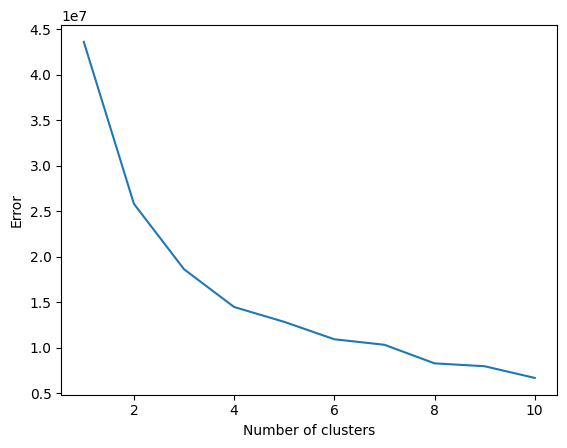

In [186]:
elbow(data.values, 10)

In [187]:
kmeans = kmeans1(data.values, 3)
y_pred = predict(data.values, kmeans[0])


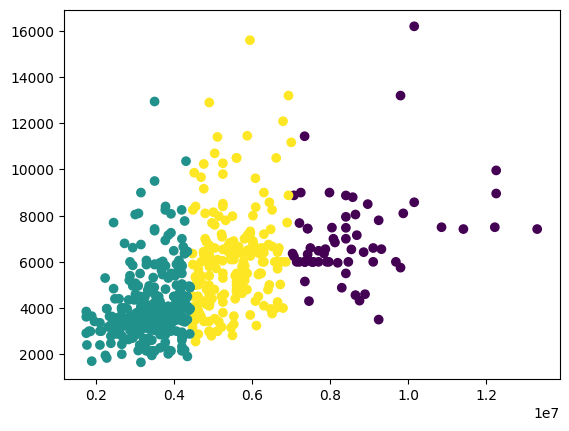

In [188]:
# visualiser les clusters
import matplotlib.pyplot as plt
plt.scatter(data['price'], data['area'], c=y_pred)
# RM: cette feature représente le nombre moyen de pièces par logement

plt.show()
 

 


In [189]:
# appliquer la regression lineaire sur chaque cluster avec une boucle
modeles= []
# pour chaque cluster
for i in range(3):
     
    # recuperer les lignes du cluster
    cluster = data[y_pred == i]
    
    # recuperer les features et la target
    X = cluster[[ 'area', 'bedrooms', 'bathrooms']]
    y = cluster['price']
    
    # appliquer la regression lineaire
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X, y)
    modeles.append(reg)
    # plot the regression line on the scatter plot of the cluster curent
    # afficher les coefficients
    print('cluster', i)
    print('intercept', reg.intercept_)
    print('coefficients', reg.coef_)


cluster 0
intercept 5233945.6225181995
coefficients [1.77701380e+02 2.99456873e+05 5.67065620e+05]
cluster 1
intercept 2235390.4130931143
coefficients [1.09274577e+02 1.38050450e+05 3.02050206e+05]
cluster 2
intercept 4163234.720929509
coefficients [9.24400438e+01 6.85550452e+04 4.04106069e+05]


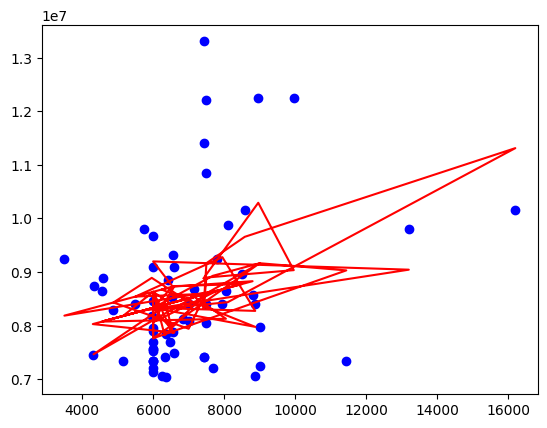

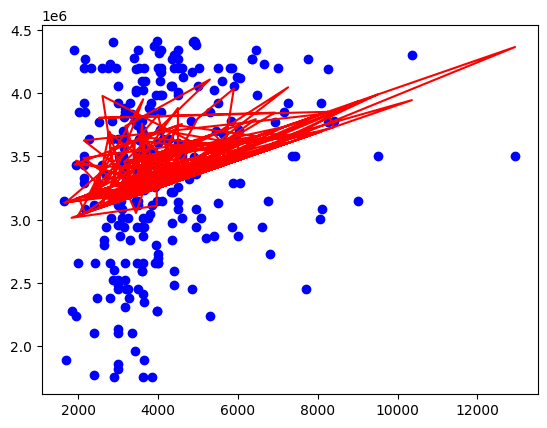

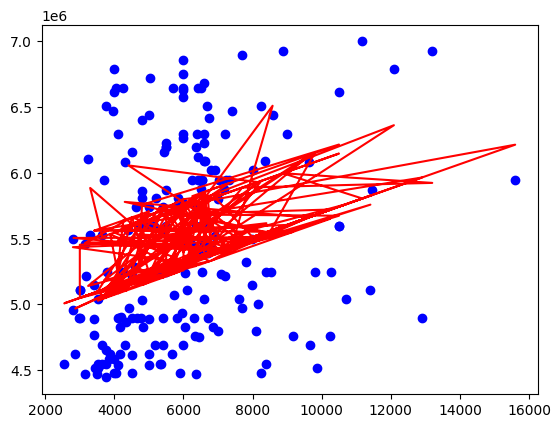

In [190]:
# tarcer chaque modele sur le scatter plot

# pour chaque cluster
for i in range(3):
    
    # recuperer les lignes du cluster
    cluster = data[y_pred == i]
    
    # recuperer les features et la target
    X = cluster[[ 'area', 'bedrooms', 'bathrooms']]
    y = cluster['price']
    
    # afficher les points du cluster
    plt.scatter(X['area'], y, c='blue')# cette ligne permet de tracer les points du cluster courant en bleu dans 
    #l'axe x on a area et en y on a price
    
    
    # tracer une la droite de regression du cluster courant
    reg = modeles[i]
    plt.plot(X['area'], reg.predict(X), c='red')
    plt.show()
    plt.close()

In [192]:

# fonction de prevision sur un nouveau house
def predict_house(house, centroids, modeles):
    label = predictOne(house, centroids)
    reg = modeles[label]
    return reg.predict([house])

In [193]:
# price	area	bedrooms	bathrooms

new_house = [270, 5, 3]
predict_house(new_house, kmeans[0][:, :-1], modeles)

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3861297.41472224])

[3705520.]


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


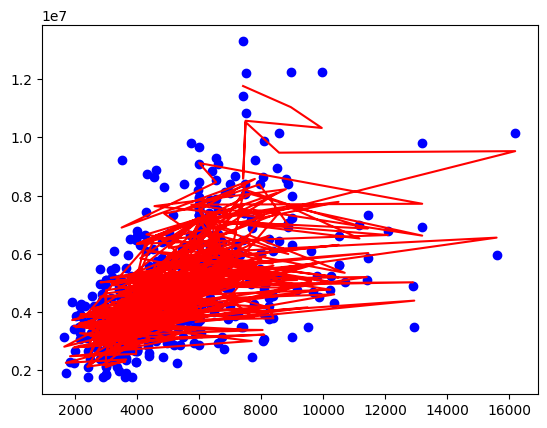

In [194]:
# etuliser le model random forest pour faire la prediction
# expliquer le model random forest
# random forest est un model de regression qui permet de faire la prediction sur un ensemble de regression lineaire
# chaque regression lineaire est entrainé sur un sous ensemble des données

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(data[['area', 'bedrooms', 'bathrooms']], data['price'])
reg.predict([new_house])
print(reg.predict([new_house]))
# visualiser le model random forest

plt.scatter(data['area'], data['price'], c='blue')
plt.plot(data['area'], reg.predict(data[['area', 'bedrooms', 'bathrooms']]), c='red')

 

In [195]:
# use desicion tree to predict the price of a house

from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor().fit(data[['area', 'bedrooms', 'bathrooms']], data['price'])
reg.predict([new_house])


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([3430000.])